In [1]:
#!pip install pycaret --ignore-installed llvmlite

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
#from pycaret.classification import setup, compare_models

In [4]:
train = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
train.select_dtypes(np.number).isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [8]:
train_num = train.select_dtypes(np.number)
train_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [9]:
train_cat = train.select_dtypes(exclude=np.number)
train_cat

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


In [10]:
train_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [11]:
ids = test["PassengerId"]
test.drop("PassengerId", inplace=True, axis=1)
train.drop("PassengerId", inplace=True, axis=1)
y = train["Transported"]
train.drop("Transported", inplace=True, axis=1)

total = pd.concat([train, test], axis=0)


In [12]:
total = total.reset_index()
total

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [13]:
total.drop("index", inplace=True, axis=1)

In [14]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [15]:
numerical = total.select_dtypes(np.number)
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0
12967,NaN,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0


In [16]:
categorical = total.select_dtypes(exclude=np.number)
categorical

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
12966,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
12967,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
12968,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [17]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0
12967,NaN,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0


In [18]:
#imputer for numerical values
from sklearn.neighbors import KNeighborsRegressor
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [19]:
numerical.isna().sum()

Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

In [20]:
numerical.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [21]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0
12967,NaN,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0


In [22]:
#numerical["Age"].corr(numerical["Survived"])



In [23]:
numerical["Survived"] = y
numerical
#numerical["Survived"] = numerical["Survived"].apply(lambda x: 1 if x == "True" else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Survived
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,NaN
12966,42.0,0.0,847.0,17.0,10.0,144.0,NaN
12967,NaN,0.0,0.0,0.0,0.0,0.0,NaN
12968,NaN,0.0,2680.0,0.0,0.0,523.0,NaN


In [24]:
#numerical["Survived"] = numerical["Survived"].replace({True: 1, False: 0})
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Survived
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,NaN
12966,42.0,0.0,847.0,17.0,10.0,144.0,NaN
12967,NaN,0.0,0.0,0.0,0.0,0.0,NaN
12968,NaN,0.0,2680.0,0.0,0.0,523.0,NaN


In [25]:
#numerical["Age"].corr(numerical["Survived"])

In [26]:
numerical["Age range"] = numerical["Age"].apply(lambda x: "Old" if x > 60 else "Middle" if x < 60 and x > 40  else "Young" )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Survived,Age range
0,39.0,0.0,0.0,0.0,0.0,0.0,False,Young
1,24.0,109.0,9.0,25.0,549.0,44.0,True,Young
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Middle
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Young
4,16.0,303.0,70.0,151.0,565.0,2.0,True,Young
...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,NaN,Young
12966,42.0,0.0,847.0,17.0,10.0,144.0,NaN,Middle
12967,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Young
12968,NaN,0.0,2680.0,0.0,0.0,523.0,NaN,Young


In [28]:
pd.pivot_table(numerical,values=["Spa"], index=['Survived'], columns=['Age range'], aggfunc="count")

Spa           
Age range Middle  Old Young
Survived                   
False        728  114  3381
True         721  103  3463

In [29]:
#for col in numerical.columns:
  #  print(pd.pivot_table(numerical,values=["Spa"], index=['Survived'], columns=[col], aggfunc="count"))

In [30]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Survived,Age range
0,39.0,0.0,0.0,0.0,0.0,0.0,False,Young
1,24.0,109.0,9.0,25.0,549.0,44.0,True,Young
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Middle
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Young
4,16.0,303.0,70.0,151.0,565.0,2.0,True,Young
...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,NaN,Young
12966,42.0,0.0,847.0,17.0,10.0,144.0,NaN,Middle
12967,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Young
12968,NaN,0.0,2680.0,0.0,0.0,523.0,NaN,Young


In [31]:
numerical["Toatl_spent"] = numerical["RoomService"] + numerical["FoodCourt"] + numerical["ShoppingMall"] + numerical["Spa"] + numerical["VRDeck"] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
print(pd.pivot_table(numerical,values=["Spa"], index=['Survived'], columns=["Toatl_spent"], aggfunc=np.sum))

                Spa                                                          \
Toatl_spent 0.0     336.0   394.0   395.0   397.0   399.0   422.0   434.0     
Survived                                                                      
False           0.0     1.0   314.0     NaN   100.0     NaN     0.0     0.0   
True            0.0     NaN     NaN     0.0     NaN     0.0     NaN     NaN   

                             ...                                            \
Toatl_spent 442.0   443.0    ...  27428.0 27650.0  27842.0 27848.0 28074.0   
Survived                     ...                                             
False           NaN   267.0  ...  14970.0     NaN  13117.0   625.0  4840.0   
True          202.0     NaN  ...      NaN    27.0      NaN     NaN     NaN   

                                                       
Toatl_spent 29608.0  30478.0 31074.0 31076.0  35987.0  
Survived                                               
False          93.0  18572.0     NaN     NaN 

In [33]:
numerical.drop(["Survived", "Age range"], inplace=True, axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


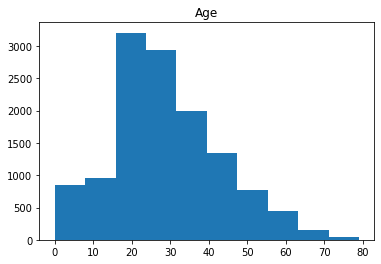

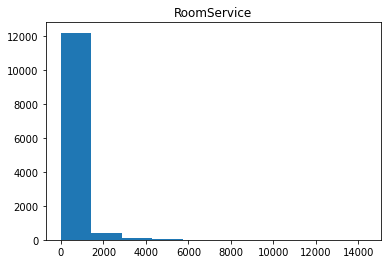

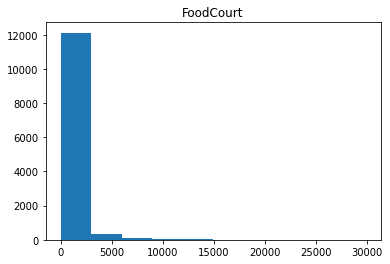

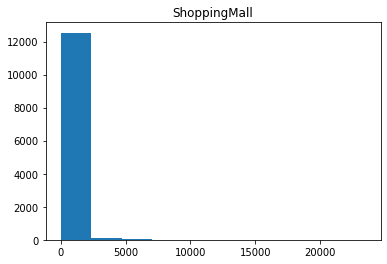

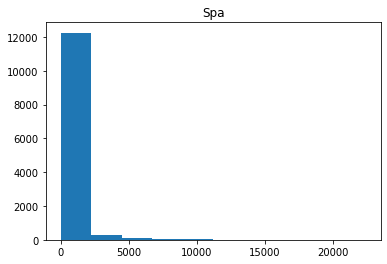

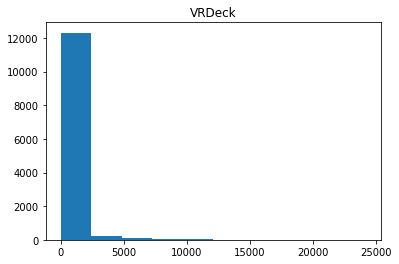

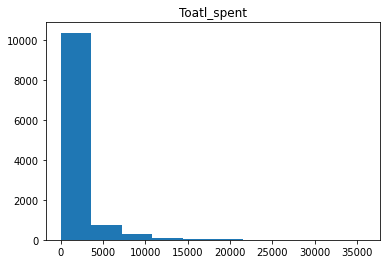

In [34]:
for i in numerical.columns:
    plt.hist(numerical[i])
    plt.title(i)
    plt.show()

In [35]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Toatl_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0
12967,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0,3203.0


In [36]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [37]:
total.isna().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [38]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Toatl_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0
12967,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0,3203.0


In [39]:
total["Transported"] = y
pd.pivot_table(total,values=["Spa"], index=['Transported'], columns=["HomePlanet"], aggfunc="count")

Spa            
HomePlanet  Earth Europa Mars
Transported                  
False        2593    712  821
True         1910   1374  902

In [40]:
pd.pivot_table(total,values=["Spa"], index=['Transported'], columns=["CryoSleep"], aggfunc="count")

Spa      
CryoSleep   False  True
Transported            
False        3571   543
True         1755  2429

In [41]:
pd.pivot_table(total,values=["Spa"], index=['Transported'], columns=["Destination"], aggfunc="count")

Spa                          
Destination 55 Cancri e PSO J318.5-22 TRAPPIST-1e
Transported                                      
False               685           388        3062
True               1076           392        2728

In [42]:
total.dropna(axis=0)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [43]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [44]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [45]:
total["Total_spent"] = total["RoomService"] + total["FoodCourt"] + total["ShoppingMall"] + total["Spa"] + total["VRDeck"]

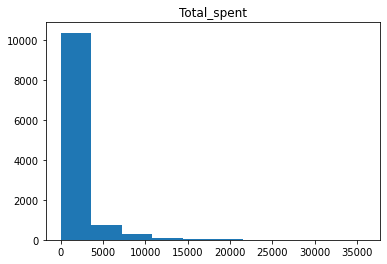

In [46]:
    plt.hist(total["Total_spent"])
    plt.title("Total_spent")
    plt.show()

In [47]:
total["Classes"] = total["Total_spent"].apply(lambda x: "Poor" if x < 1000 else "Middle spent" if x > 1000 and x < 7500 else "Rich")

In [48]:
total["Classes"]

0                Poor
1                Poor
2                Rich
3        Middle spent
4        Middle spent
             ...     
12965            Poor
12966    Middle spent
12967            Poor
12968    Middle spent
12969            Poor
Name: Classes, Length: 12970, dtype: object

In [49]:
total["Ages Intervals"] = total["Age"].apply(lambda x: "Young" if x < 40 else "Not young ")

In [50]:
total["Ages Intervals"]

0             Young
1             Young
2        Not young 
3             Young
4             Young
            ...    
12965         Young
12966    Not young 
12967    Not young 
12968    Not young 
12969    Not young 
Name: Ages Intervals, Length: 12970, dtype: object

In [51]:
pd.pivot_table(total,values=["Spa"], index=['Classes'], columns=["Ages Intervals"], aggfunc="count")

Spa      
Ages Intervals Not young  Young
Classes                        
Middle spent          963  2501
Poor                 1601  6085
Rich                  406  1130

In [52]:
pd.pivot_table(total,values=["Spa"], index=['Transported'], columns=["Classes"], aggfunc="count")

Spa           
Classes     Middle spent  Poor Rich
Transported                        
False               1594  2060  569
True                 700  3116  471

In [53]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_spent,Classes,Ages Intervals
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Poor,Young
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Poor,Young
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Rich,Not young
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Middle spent,Young
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Middle spent,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0.0,Poor,Young
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1018.0,Middle spent,Not young
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0.0,Poor,Not young
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,3203.0,Middle spent,Not young


In [54]:
categorical

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
12966,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
12967,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
12968,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [55]:
total["Deck"] = total["Cabin"].str[0]
total["P/S"] = total["Cabin"].str[-1]

In [56]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_spent,Classes,Ages Intervals,Deck,P/S
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Poor,Young,B,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Poor,Young,F,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Rich,Not young,A,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Middle spent,Young,A,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Middle spent,Young,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0.0,Poor,Young,G,S
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1018.0,Middle spent,Not young,NaN,NaN
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0.0,Poor,Not young,D,P
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,3203.0,Middle spent,Not young,D,P


In [57]:
total

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_spent,Classes,Ages Intervals,Deck,P/S
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,Poor,Young,B,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,Poor,Young,F,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,Rich,Not young,A,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,Middle spent,Young,A,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,Middle spent,Young,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0.0,Poor,Young,G,S
12966,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1018.0,Middle spent,Not young,NaN,NaN
12967,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0.0,Poor,Not young,D,P
12968,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,3203.0,Middle spent,Not young,D,P


In [58]:
total.drop(["Cabin", "Name"], inplace=True, axis=1)

In [59]:
total

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Classes,Ages Intervals,Deck,P/S
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,Poor,Young,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,Poor,Young,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,Rich,Not young,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,Middle spent,Young,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,Middle spent,Young,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,Young,G,S
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1018.0,Middle spent,Not young,NaN,NaN
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,Not young,D,P
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,3203.0,Middle spent,Not young,D,P


In [60]:
total["Age Intervals"] = total["Age"].apply(lambda x: "Young" if x < 20 else "Middle" if x > 20 and x < 50 else "Old")

In [61]:
total

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Classes,Ages Intervals,Deck,P/S,Age Intervals
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,Poor,Young,B,P,Middle
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,Poor,Young,F,S,Middle
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,Rich,Not young,A,S,Old
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,Middle spent,Young,A,S,Middle
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,Middle spent,Young,F,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,Young,G,S,Middle
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1018.0,Middle spent,Not young,NaN,NaN,Middle
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,Not young,D,P,Old
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,3203.0,Middle spent,Not young,D,P,Old


In [62]:
total.drop(["Ages Intervals"], inplace=True, axis=1)

In [63]:
pd.pivot_table(total, values="Total_spent", index=["Age Intervals"], columns=["Classes"], aggfunc="count")

Classes,Middle spent,Poor,Rich
Age Intervals,,,
Middle,2413,4259,353
Old,574,1047,80
Young,477,2380,24


In [64]:

total


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Classes,Deck,P/S,Age Intervals
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,Poor,B,P,Middle
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,Poor,F,S,Middle
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,Rich,A,S,Old
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,Middle spent,A,S,Middle
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,Middle spent,F,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,G,S,Middle
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1018.0,Middle spent,NaN,NaN,Middle
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,D,P,Old
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,3203.0,Middle spent,D,P,Old


In [65]:
numerical = total.select_dtypes(np.number)

In [66]:
numerical.isna().sum()

Age              270
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Total_spent     1363
dtype: int64

In [67]:
for col in numerical.columns:
    print(numerical["Age"].corr(numerical[col]))

1.0
0.06730039263494127
0.12444701749523511
0.034958595494290555
0.11899181735685138
0.10144050633972178
0.1810965023599733


In [68]:
total

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Classes,Deck,P/S,Age Intervals
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,Poor,B,P,Middle
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,Poor,F,S,Middle
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,Rich,A,S,Old
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,Middle spent,A,S,Middle
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,Middle spent,F,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,G,S,Middle
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1018.0,Middle spent,NaN,NaN,Middle
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,D,P,Old
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,3203.0,Middle spent,D,P,Old


In [69]:
pd.pivot_table(total, values="Total_spent", index=["Age Intervals"], columns=["Classes"], aggfunc="count")

Classes,Middle spent,Poor,Rich
Age Intervals,,,
Middle,2413,4259,353
Old,574,1047,80
Young,477,2380,24


In [70]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0
12967,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0,3203.0


In [71]:
total["Age"].loc[(total["Age Intervals"] == "Young") & (total["Classes"] == "Poor") & (total["Age"].isna() == False)].mean()

11.378151260504202

In [72]:
total["Age"].isna().sum()

270

In [73]:
age_means = []
for val1 in  total["Age Intervals"].unique():
    for val2 in total["Classes"].unique():
            age_means.append(total["Age"].loc[(total["Age Intervals"] == val1) & (total["Classes"] == val2) & (total["Age"].isna() == False)].mean())
            total["Age"][(total["Age Intervals"] == val1) & (total["Classes"] == val2)] = total["Age"][(total["Age Intervals"] == val1) & (total["Classes"] == val2)].fillna(total["Age"].loc[(total["Age Intervals"] == val1) & (total["Classes"] == val2)].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
total["Age"] = total["Age"].round()

In [75]:
total["Age"].isna().sum()

0

In [76]:
mean_spent_young = total["Total_spent"].loc[total["Age Intervals"] == "Young"].mean()
mean_spent_middle = total["Total_spent"].loc[total["Age Intervals"] == "Middle"].mean()
mean_spent_old = total["Total_spent"].loc[total["Age Intervals"] == "Old"].mean()

In [77]:
total["Total_spent"][total["Age Intervals"] == "Young"] = total["Total_spent"][total["Age Intervals"] == "Young"].fillna(mean_spent_young)
total["Total_spent"][total["Age Intervals"] == "Middle"] = total["Total_spent"][total["Age Intervals"] == "Middle"].fillna(mean_spent_middle)
total["Total_spent"][total["Age Intervals"] == "Old"] = total["Total_spent"][total["Age Intervals"] == "Old"].fillna(mean_spent_old)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [78]:
total["Total_spent"].isna().sum()

0

In [79]:
#total["Age"].loc[(total["Age Intervals"] == val1) & (total["Classes"] == val2) & (total["Age"].isna() == False)] = 10

In [80]:
#total["Age"] = 10

In [81]:
total["Age"].isna().sum()

0

In [82]:
total

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spent,Classes,Deck,P/S,Age Intervals
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,Poor,B,P,Middle
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,Poor,F,S,Middle
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,Rich,A,S,Old
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,Middle spent,A,S,Middle
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,Middle spent,F,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,G,S,Middle
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,1018.0,Middle spent,NaN,NaN,Middle
12967,Mars,True,55 Cancri e,46.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Poor,D,P,Old
12968,Europa,False,NaN,49.0,False,0.0,2680.0,0.0,0.0,523.0,NaN,3203.0,Middle spent,D,P,Old


In [83]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0
12967,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0,3203.0


In [84]:
total.isna().sum()

HomePlanet        288
CryoSleep         310
Destination       274
Age                 0
VIP               296
RoomService       263
FoodCourt         289
ShoppingMall      306
Spa               284
VRDeck            268
Transported      4277
Total_spent         0
Classes             0
Deck              299
P/S               299
Age Intervals       0
dtype: int64

In [85]:
numerical = total.select_dtypes(np.number)
categorical = total.select_dtypes(exclude=np.number)

In [86]:
numerical.isna().sum()

Age               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Total_spent       0
dtype: int64

In [87]:
for column in numerical.columns:
    if numerical[column].isna().sum() > 0:
        numerical = knn_impute(numerical, column)
        

In [88]:
numerical.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Total_spent     0
dtype: int64

In [89]:
categorical

,HomePlanet,CryoSleep,Destination,VIP,Transported,Classes,Deck,P/S,Age Intervals
0,Europa,False,TRAPPIST-1e,False,False,Poor,B,P,Middle
1,Earth,False,TRAPPIST-1e,False,True,Poor,F,S,Middle
2,Europa,False,TRAPPIST-1e,True,False,Rich,A,S,Old
3,Europa,False,TRAPPIST-1e,False,False,Middle spent,A,S,Middle
4,Earth,False,TRAPPIST-1e,False,True,Middle spent,F,S,Young
...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,False,NaN,Poor,G,S,Middle
12966,Earth,False,TRAPPIST-1e,False,NaN,Middle spent,NaN,NaN,Middle
12967,Mars,True,55 Cancri e,False,NaN,Poor,D,P,Old
12968,Europa,False,NaN,False,NaN,Middle spent,D,P,Old


In [90]:
categorical.drop(["Transported"], inplace=True, axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
categorical.isna().sum()

HomePlanet       288
CryoSleep        310
Destination      274
VIP              296
Classes            0
Deck             299
P/S              299
Age Intervals      0
dtype: int64

In [92]:
pd.pivot_table(categorical, values="Classes", index=["HomePlanet"], columns=["Destination"], aggfunc="count")

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,984,1065,4672
Europa,1310,29,1737
Mars,294,67,2256


In [93]:
categorical["VIP"].unique()

array([False, True, nan], dtype=object)

In [94]:
for val in categorical["Destination"].unique():
    
    if pd.isna(val) == False:
        #print(categorical["HomePlanet"][categorical["Destination"] == val])
        #print(categorical["HomePlanet"][categorical["Destination"] == val].value_counts().idxmax())
        categorical["HomePlanet"][categorical["Destination"] == val] = categorical["HomePlanet"][categorical["Destination"] == val].fillna(categorical["HomePlanet"][categorical["Destination"] == val].value_counts().idxmax())
    else:
        print(categorical[(categorical["Destination"].isna() == True) & (categorical["HomePlanet"].isna() == True)])
        
        categorical["HomePlanet"][(categorical["Destination"].isna() == True) & (categorical["HomePlanet"].isna() == True)] = "Europa"

      HomePlanet CryoSleep Destination    VIP       Classes Deck P/S  \
347          NaN     False         NaN  False          Poor    G   P   
5208         NaN     False         NaN    NaN          Poor    G   S   
5687         NaN     False         NaN  False  Middle spent    F   S   
6629         NaN     False         NaN  False          Poor    G   P   
9853         NaN     False         NaN  False          Poor    G   S   
11876        NaN     False         NaN  False          Rich    D   S   

      Age Intervals  
347          Middle  
5208         Middle  
5687            Old  
6629          Young  
9853          Young  
11876           Old  


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [95]:
 len(categorical["Destination"].values)

12970

In [96]:
categorical[categorical["HomePlanet"].isna() == True]

,HomePlanet,CryoSleep,Destination,VIP,Classes,Deck,P/S,Age Intervals


In [97]:
categorical["VIP"].unique()

array([False, True, nan], dtype=object)

In [98]:
for col in categorical.columns:
    if col != "HomePlanet":
        for val in categorical["HomePlanet"].unique():    
            if pd.isna(val) == False:
        #print(categorical["HomePlanet"][categorical["Destination"] == val])
        #print(categorical["HomePlanet"][categorical["Destination"] == val].value_counts().idxmax())
                print(categorical[col][categorical["HomePlanet"] == val].value_counts().idxmax())
                categorical[col][categorical["HomePlanet"] == val] = categorical[col][categorical["HomePlanet"] == val].fillna(categorical[col][categorical["HomePlanet"] == val].value_counts().idxmax())

False
False
False
TRAPPIST-1e
TRAPPIST-1e
TRAPPIST-1e
False
False
False
Poor
Poor
Middle spent
B
G
F
S
P
P
Middle
Middle
Middle


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [99]:
categorical.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
VIP              0
Classes          0
Deck             0
P/S              0
Age Intervals    0
dtype: int64

In [100]:
total =  numerical.join([categorical])

In [101]:
total.isna().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Total_spent      0
HomePlanet       0
CryoSleep        0
Destination      0
VIP              0
Classes          0
Deck             0
P/S              0
Age Intervals    0
dtype: int64

In [102]:
total

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent,HomePlanet,CryoSleep,Destination,VIP,Classes,Deck,P/S,Age Intervals
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Europa,False,TRAPPIST-1e,False,Poor,B,P,Middle
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,Earth,False,TRAPPIST-1e,False,Poor,F,S,Middle
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,Europa,False,TRAPPIST-1e,True,Rich,A,S,Old
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,Europa,False,TRAPPIST-1e,False,Middle spent,A,S,Middle
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,Earth,False,TRAPPIST-1e,False,Middle spent,F,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Earth,True,TRAPPIST-1e,False,Poor,G,S,Middle
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0,Earth,False,TRAPPIST-1e,False,Middle spent,G,P,Middle
12967,46.0,0.0,0.0,0.0,0.0,0.0,0.0,Mars,True,55 Cancri e,False,Poor,D,P,Old
12968,49.0,0.0,2680.0,0.0,0.0,523.0,3203.0,Europa,False,TRAPPIST-1e,False,Middle spent,D,P,Old


In [103]:
len(train)

8693

In [104]:
numerical = total.select_dtypes(np.number)
categorical = total.select_dtypes(exclude=np.number)


In [105]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0
...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1018.0
12967,46.0,0.0,0.0,0.0,0.0,0.0,0.0
12968,49.0,0.0,2680.0,0.0,0.0,523.0,3203.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


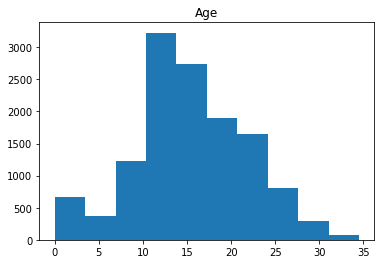

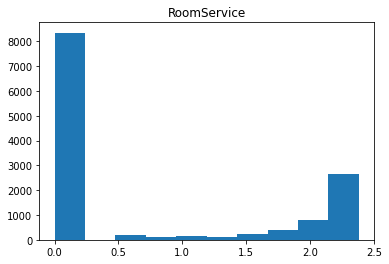

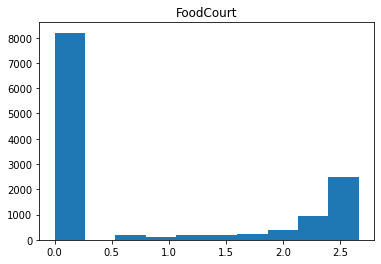

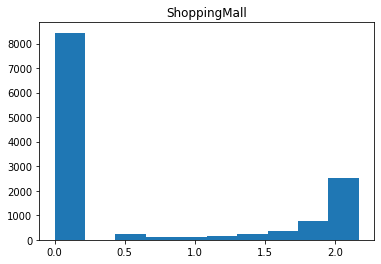

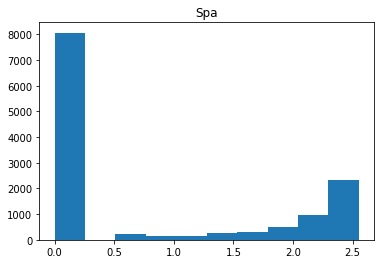

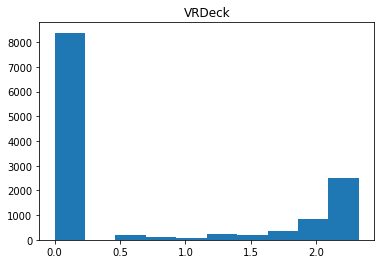

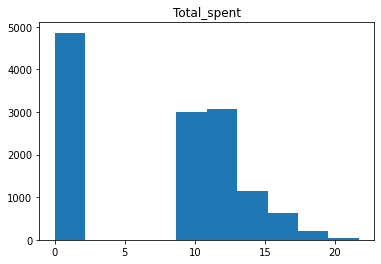

In [106]:
numerical
from scipy.stats import boxcox
for col in numerical.columns:
    numerical[col], lmbda = boxcox(numerical[col]+1, lmbda=None)
    plt.hist(numerical[col])
    plt.title(col)
    plt.show()
    

In [107]:
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent
0,19.956397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,13.621438,2.078609,1.554157,1.696452,2.376663,1.888973,10.267996
2,27.178043,1.917807,2.588603,0.000000,2.519964,1.909487,17.435185
3,17.508776,0.000000,2.526932,2.045184,2.492495,2.105819,15.313740
4,9.859048,2.198622,2.154198,1.970862,2.379203,0.878245,11.189038
...,...,...,...,...,...,...,...
12965,17.923727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12966,21.145483,0.000000,2.494568,1.605855,1.568314,2.072619,11.023654
12967,22.699415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12968,23.843319,0.000000,2.573523,0.000000,0.000000,2.192704,13.955286


In [108]:
categorical = pd.get_dummies(categorical)

In [109]:
categorical

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,P/S_P,P/S_S,Age Intervals_Middle,Age Intervals_Old,Age Intervals_Young
0,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
2,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
12966,1,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
12967,0,0,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
12968,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0


In [110]:
total = pd.concat([numerical, categorical], axis=1)

In [111]:
total

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,P/S_P,P/S_S,Age Intervals_Middle,Age Intervals_Old,Age Intervals_Young
0,19.956397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,13.621438,2.078609,1.554157,1.696452,2.376663,1.888973,10.267996,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,27.178043,1.917807,2.588603,0.000000,2.519964,1.909487,17.435185,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,17.508776,0.000000,2.526932,2.045184,2.492495,2.105819,15.313740,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,9.859048,2.198622,2.154198,1.970862,2.379203,0.878245,11.189038,1,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,17.923727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,1,1,0,0
12966,21.145483,0.000000,2.494568,1.605855,1.568314,2.072619,11.023654,1,0,0,...,0,0,0,1,0,1,0,1,0,0
12967,22.699415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,...,1,0,0,0,0,1,0,0,1,0
12968,23.843319,0.000000,2.573523,0.000000,0.000000,2.192704,13.955286,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(total)

total = pd.DataFrame(scaler.transform(total), index=total.index, columns=total.columns)

In [113]:
total

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,P/S_P,P/S_S,Age Intervals_Middle,Age Intervals_Old,Age Intervals_Young
0,0.705496,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,-1.098765,1.750224,-0.510820,...,-0.242437,-0.337033,-0.703757,-0.660789,-0.029135,0.996460,-0.996460,0.806174,-0.413522,-0.574086
1,-0.288336,1.384712,0.682609,1.195862,1.533391,1.262809,0.433272,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,1.420946,-0.660789,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
2,1.838431,1.222244,1.623620,-0.704073,1.670666,1.284228,1.602901,-1.098765,1.750224,-0.510820,...,-0.242437,-0.337033,-0.703757,-0.660789,-0.029135,-1.003553,1.003553,-1.240426,2.418252,-0.574086
3,0.321512,-0.715453,1.567520,1.586424,1.644352,1.489220,1.256698,-1.098765,1.750224,-0.510820,...,-0.242437,-0.337033,-0.703757,-0.660789,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
4,-0.878582,1.505970,1.228452,1.503188,1.535824,0.207501,0.583579,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,1.420946,-0.660789,-0.029135,-1.003553,1.003553,-1.240426,-0.413522,1.741900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.386609,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,-0.703757,1.513343,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
12966,0.892040,-0.715453,1.538079,1.094398,0.759034,1.454555,0.556590,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,-0.703757,1.513343,-0.029135,0.996460,-0.996460,0.806174,-0.413522,-0.574086
12967,1.135822,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,-1.098765,-0.571356,1.957636,...,4.124790,-0.337033,-0.703757,-0.660789,-0.029135,0.996460,-0.996460,-1.240426,2.418252,-0.574086
12968,1.315278,-0.715453,1.609903,-0.704073,-0.743332,1.579937,1.035009,-1.098765,1.750224,-0.510820,...,4.124790,-0.337033,-0.703757,-0.660789,-0.029135,0.996460,-0.996460,-1.240426,2.418252,-0.574086


In [114]:
train = total.loc[:train.index.max(), :].copy()
test = total.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [115]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [116]:
target = y.apply(lambda x: 1 if x else 0)

In [117]:
target

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [118]:
#!pip install pycaret --ignore-installed llvmlite

In [119]:
#from pycaret.classification import *

In [120]:
#!pip uninstall scikit-learn 


In [121]:
#!pip install scikit-learn==0.23.2

In [122]:
 #_ = setup(data=pd.concat([train, target], axis=1), target='Transported')

In [123]:
 #compare_models()

In [124]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [125]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,P/S_P,P/S_S,Age Intervals_Middle,Age Intervals_Old,Age Intervals_Young
0,-0.079783,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,-0.703757,1.513343,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
1,-0.650515,-0.715453,0.682609,-0.704073,1.637073,-0.709482,0.980264,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,1.420946,-0.660789,-0.029135,-1.003553,1.003553,-1.240426,-0.413522,1.741900
2,0.189866,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,-1.098765,1.750224,-0.510820,...,-0.242437,-0.337033,-0.703757,-0.660789,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
3,0.642550,-0.715453,1.648648,-0.704073,1.415900,1.587955,1.431901,-1.098765,1.750224,-0.510820,...,-0.242437,-0.337033,-0.703757,-0.660789,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
4,-0.576430,0.824421,-0.731172,1.622252,-0.743332,-0.709482,0.384524,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,1.420946,-0.660789,-0.029135,-1.003553,1.003553,-1.240426,2.418252,-0.574086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.386609,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,-0.703757,1.513343,-0.029135,-1.003553,1.003553,0.806174,-0.413522,-0.574086
4273,0.892040,-0.715453,1.538079,1.094398,0.759034,1.454555,0.556590,0.910113,-0.571356,-0.510820,...,-0.242437,-0.337033,-0.703757,1.513343,-0.029135,0.996460,-0.996460,0.806174,-0.413522,-0.574086
4274,1.135822,-0.715453,-0.731172,-0.704073,-0.743332,-0.709482,-1.242385,-1.098765,-0.571356,1.957636,...,4.124790,-0.337033,-0.703757,-0.660789,-0.029135,0.996460,-0.996460,-1.240426,2.418252,-0.574086
4275,1.315278,-0.715453,1.609903,-0.704073,-0.743332,1.579937,1.035009,-1.098765,1.750224,-0.510820,...,4.124790,-0.337033,-0.703757,-0.660789,-0.029135,0.996460,-0.996460,-1.240426,2.418252,-0.574086


In [126]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.20, random_state=1)

In [127]:
CatBoost_clf = CatBoostClassifier()
# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.023581
0:	learn: 0.6807742	total: 56.9ms	remaining: 56.9s
1:	learn: 0.6706990	total: 60ms	remaining: 30s
2:	learn: 0.6609877	total: 62.8ms	remaining: 20.9s
3:	learn: 0.6503416	total: 65.7ms	remaining: 16.4s
4:	learn: 0.6410899	total: 68.4ms	remaining: 13.6s
5:	learn: 0.6312326	total: 71.2ms	remaining: 11.8s
6:	learn: 0.6225332	total: 74ms	remaining: 10.5s
7:	learn: 0.6153915	total: 77.1ms	remaining: 9.56s
8:	learn: 0.6080898	total: 80.6ms	remaining: 8.88s
9:	learn: 0.6010558	total: 84.7ms	remaining: 8.39s
10:	learn: 0.5948799	total: 89.6ms	remaining: 8.05s
11:	learn: 0.5889117	total: 92.7ms	remaining: 7.63s
12:	learn: 0.5831509	total: 96.3ms	remaining: 7.31s
13:	learn: 0.5764744	total: 102ms	remaining: 7.16s
14:	learn: 0.5698477	total: 108ms	remaining: 7.08s
15:	learn: 0.5642247	total: 114ms	remaining: 7s
16:	learn: 0.5595198	total: 117ms	remaining: 6.75s
17:	learn: 0.5561510	total: 120ms	remaining: 6.53s
18:	learn: 0.5520939	total: 122ms	remaining: 6.32s
19:	lea

In [128]:
catboost_pred = CatBoost_clf.predict(X_val)

In [129]:
from sklearn.metrics import accuracy_score
# printing
print("The accuracy is: ", accuracy_score(y_val, catboost_pred))

The accuracy is:  0.8159861989649224


In [130]:
test_pred = CatBoost_clf.predict(test)

In [131]:
test_pred = [True if x else False for x in test_pred]

In [132]:
submission = pd.concat([ids, pd.Series(test_pred, name='Transported')], axis=1)

In [133]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [134]:
submission.to_csv('./submission.csv', index=False, header=True)